# Exercises 5.1: PCA

### PA Women in Tech: Intro to Data Science with Python

In these exercises we will look at performing **PCA** on a dataset. We will:
- load in a dataset
- explore the dataset
- standardise the data
- apply PCA

First, we import the pandas and seaborn libraries and necessary sklearn objects

In [49]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

## Data loading

In these exercises we'll be looking at a dataset which contains nutrient data on different foods.

1a. Load the `Nutrient_Data.csv` dataset into a dataframe called `df_nutrients`

In [63]:
df_nutrients = pd.read_csv("Nutrient_Data.csv")

1b. Show the first 5 rows of the dataframe

In [64]:
df_nutrients.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


1c. Drop the columns with NaN values: "ID", "ShortDescrip", "Descrip", "CommonName", "MfgName", "ScientificName"

In [65]:
#df2= df_nutrients.dropna(axis=1)
#df2.head()

df3 = df_nutrients.drop(["ID", "ShortDescrip", "Descrip", "CommonName", "MfgName", "ScientificName"], axis =1)
df3

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,Dairy and Egg Products,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,Dairy and Egg Products,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,Dairy and Egg Products,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,Dairy and Egg Products,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,Dairy and Egg Products,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,Finfish and Shellfish Products,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,Finfish and Shellfish Products,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,Sweets,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,Finfish and Shellfish Products,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,...,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


1d. Print the unique values of FoodGroup column, using the dataframe `.unique()` method

In [67]:
food_groups = df_nutrients['FoodGroup'].unique()

pd.DataFrame(food_groups).head(11)

,0
0,Dairy and Egg Products
1,Spices and Herbs
2,Baby Foods
3,Fats and Oils
4,Poultry Products
5,"Soups, Sauces, and Gravies"
6,Sausages and Luncheon Meats
7,Breakfast Cereals
8,Snacks
9,Fruits and Fruit Juices


We can reduce the problem by selecting only rows that have the FoodGroup values "Meals, Entrees, and Side Dishes", "Fats and Oils" and "Poultry Products"

In [68]:
food_groups = ["Meals, Entrees, and Side Dishes", "Fats and Oils", "Poultry Products"]
df_nutrients = df_nutrients[df_nutrients['FoodGroup'].isin(food_groups)]

1e. Update the dataframe so that it contains only the columns "FoodGroup","Energy_kcal", "Protein_g", "Fat_g", "Sugar_g" and "Fiber_g"; display the resulting dataframe

In [69]:
df_nutrients = df_nutrients[["FoodGroup","Energy_kcal", "Protein_g", "Fat_g", "Sugar_g", "Fiber_g"]]
df_nutrients.head()

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Sugar_g,Fiber_g
610,Fats and Oils,902.0,0.0,100.0,0.0,0.0
611,Fats and Oils,902.0,0.0,100.0,0.0,0.0
612,Fats and Oils,334.0,0.6,32.9,4.2,0.1
613,Fats and Oils,70.0,0.2,2.7,6.8,2.0
614,Fats and Oils,84.0,0.2,2.7,10.3,1.9


## Defining the features

2a. Define the features `X` (the input features) and label `y` (the output feature - "FoodGroup")

In [70]:
X = df_nutrients.drop(columns= ['FoodGroup'])
y = df_nutrients['FoodGroup']

2b. Check if there are any missing values in `X` and `y`

In [71]:
X.isnull().sum()

Energy_kcal    0
Protein_g      0
Fat_g          0
Sugar_g        0
Fiber_g        0
dtype: int64

In [72]:
y.isnull().sum()

0

2c. Standardise the input data

In [73]:
scaler = StandardScaler() 
scaler = scaler.fit(X) # fit the scaler to our model, X

data_standardised = scaler.transform(X)
data_standardised

array([[ 2.16908082, -1.22958138,  2.11283965, -0.36946896, -0.38712748],
       [ 2.16908082, -1.22958138,  2.11283965, -0.36946896, -0.38712748],
       [ 0.04010875, -1.17575706,  0.16645524,  0.72698412, -0.27756024],
       ...,
       [-0.57459445,  1.39883975, -0.64284618, -0.36946896, -0.38712748],
       [ 1.3669681 , -1.22958138,  1.46887938, -0.29115089, -0.38712748],
       [ 2.10161339, -1.22958138,  2.11283965, -0.36946896, -0.38712748]])

## PCA

3a. Perform the PCA with 2 components and print the `explained_variance_ratio_`

In [74]:
pca = PCA(n_components = 2)

principalComponents = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

[0.9982585  0.00122076]


3b. Convert the output of PCA to a DataFrame with column names 'PC1' and 'PC2', and display the result

In [54]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,583.428259,-0.914412
1,583.428259,-0.914412
2,11.654956,13.763365
3,-253.959508,21.661766
4,-240.082141,21.663538
...,...,...
717,-116.879948,-11.710854
718,-116.897512,-11.923484
719,-155.204644,-12.148864
720,368.404140,5.271079


3c. Attach the label `y` values to the newly created dataframe and display the first 5 rows

In [75]:
principalDf['FoodGroup'] = y.values
principalDf.head()

,principal component 1,principal component 2,FoodGroup
0,583.428259,-0.914412,Fats and Oils
1,583.428259,-0.914412,Fats and Oils
2,11.654956,13.763365,Fats and Oils
3,-253.959508,21.661766,Fats and Oils
4,-240.082141,21.663538,Fats and Oils


## Visualising

4. Plot a scatterplot of PC1 against PC2 using seaborn with `hue="FoodGroup"`

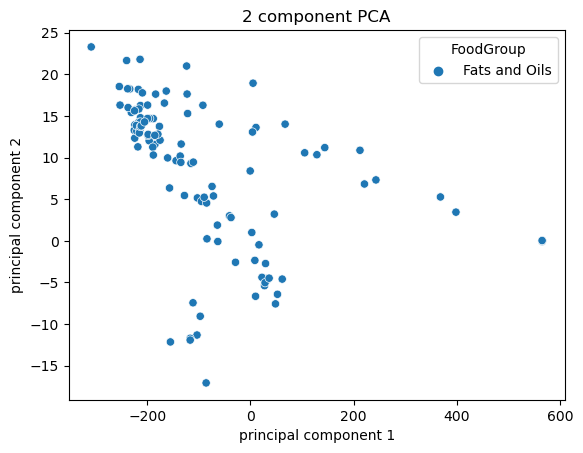

In [59]:
plt.title('2 component PCA')
sns.scatterplot(data = principalDf, x = "principal component 1", y = "principal component 2", hue="FoodGroup")
plt.show()